<a href="https://colab.research.google.com/github/Ashkar077/Parkinson-s-Disease-ML-Project/blob/main/Parkinson%E2%80%99s_Disease_Project_By_Abdul_Askhr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB as Naive_Bayes
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

from IPython.display import display


In [102]:
df=pd.read_csv('https://raw.githubusercontent.com/Ashkar077/Parkinson-s-Disease-ML-Project/main/ParkinsonsDataset.csv')

In [103]:
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [104]:
df.shape

(195, 24)

In [105]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [106]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [107]:
df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [108]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [109]:
df.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [110]:
X = df.drop(columns=['name', 'status'],axis=1)
y = df['status']

print('Feature (X) Shape Before Balancing :', X.shape)
print('Target (y) Shape Before Balancing :', y.shape)

Feature (X) Shape Before Balancing : (195, 22)
Target (y) Shape Before Balancing : (195,)


In [111]:
# Resampling Data using SMOTE Object

sm = SMOTE(random_state=300)
X, y = sm.fit_resample(X, y)
print('Feature (X) Shape After Balancing :', X.shape)
print('Target (y) Shape After Balancing :', y.shape)

Feature (X) Shape After Balancing : (294, 22)
Target (y) Shape After Balancing : (294,)


In [112]:
scaler = MinMaxScaler((-1,1))
X_features = scaler.fit_transform(X)
Y_labels = y

In [113]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X_features, Y_labels , test_size=0.20, random_state=20)

In [114]:
#Applying Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
predDT = clf.predict(X_test)

print(classification_report(y_test, predDT))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89        33
           1       0.83      0.92      0.87        26

    accuracy                           0.88        59
   macro avg       0.88      0.89      0.88        59
weighted avg       0.89      0.88      0.88        59



In [115]:
param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' :range(1,10),
    'random_state':range(30,210,30),
    'criterion' :['gini', 'entropy']
}
CV_dt = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_dt.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'random_state': range(30, 210, 30)})

In [116]:
CV_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'auto',
 'random_state': 120}

In [117]:
dt1=DecisionTreeClassifier(random_state=120, max_features='auto', max_depth=6, criterion='entropy')
dt1.fit(X_train, y_train)
predDT = dt1.predict(X_test) 
print(classification_report(y_test, predDT))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        33
           1       0.96      0.88      0.92        26

    accuracy                           0.93        59
   macro avg       0.94      0.93      0.93        59
weighted avg       0.93      0.93      0.93        59



/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


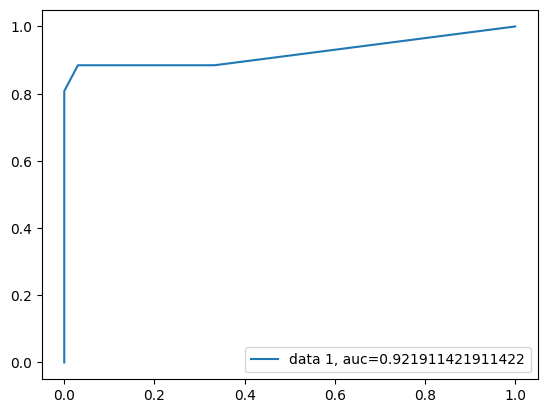

In [118]:
y_pred_proba = dt1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [119]:
#Applying SVM Using Linear Kernal
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [120]:
y_pred = clf.predict(X_test)
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

Test Set Accuracy: 0.8135593220338984


In [121]:
X_pred = clf.predict(X_train)
print("Train Set Accuracy:",metrics.accuracy_score(y_train, X_pred))

Train Set Accuracy: 0.8638297872340426


In [122]:
param_grid = {'kernel':['linear','rbf','poly'],'C': [0.5, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

grid_SVC = GridSearchCV(svm.SVC(), param_grid, scoring='f1', verbose = 3)
grid_SVC.fit(X_train, y_train)

print("\nBest Parameters: ", grid_SVC.best_params_)

#Here we apply hyper-parameter tuning

print("\n", grid_SVC.best_estimator_)

predSVC = grid_SVC.predict(X_test) 

print("\n", classification_report(y_test, predSVC)) 

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.913 total time=   0.0s
[CV 2/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.884 total time=   0.0s
[CV 3/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.800 total time=   0.0s
[CV 4/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.744 total time=   0.0s
[CV 5/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.818 total time=   0.0s
[CV 1/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.939 total time=   0.0s
[CV 2/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 3/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.889 total time=   0.0s
[CV 4/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.979 total time=   0.0s
[CV 5/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.894 total time=   0.0s
[CV 1/5] END .......C=0.5, gamma=1, kernel=poly;, score=0.894 total time=   0.0s
[CV 2/5] END .......C=0.5, gamma=1, kernel=poly

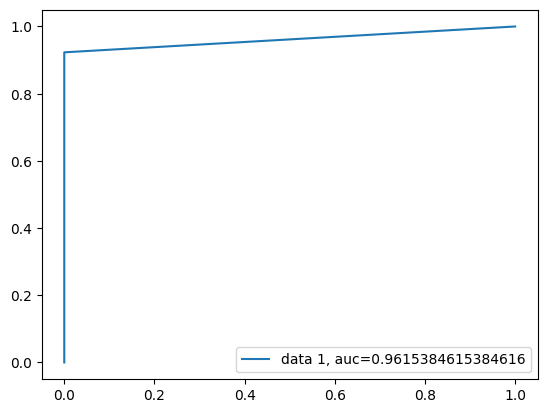

In [123]:
fpr, tpr, _ = metrics.roc_curve(y_test,  predSVC)
auc = metrics.roc_auc_score(y_test, predSVC)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [124]:
#applying Naive Bayes

gnb = Naive_Bayes()
gnb.fit(X_train, y_train)
predgnb = gnb.predict(X_test)

print(classification_report(y_test, predgnb))

              precision    recall  f1-score   support

           0       0.71      0.97      0.82        33
           1       0.93      0.50      0.65        26

    accuracy                           0.76        59
   macro avg       0.82      0.73      0.74        59
weighted avg       0.81      0.76      0.75        59



In [125]:
print("Confusion Matrix:")
confusion_matrix(y_test, predgnb)

Confusion Matrix:


array([[32,  1],
       [13, 13]])

In [126]:
accuracy_testing = accuracy_score(y_test, predgnb)
print("Accuracy % :",accuracy_testing*100)

Accuracy % : 76.27118644067797


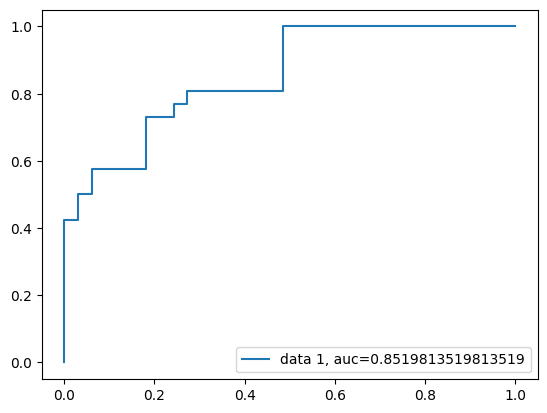

In [127]:
y_pred_proba = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Comparing the results on different models

In [128]:
from sklearn.metrics import precision_score,recall_score ,accuracy_score, f1_score, r2_score, log_loss

chart = {
        'Metric':["Accuracy", "F1-Score", "Recall", "Precision", "R2-Score"],
        'DT':[accuracy_score(y_test, predDT), f1_score(y_test, predDT), recall_score(y_test, predDT), precision_score(y_test, predDT), r2_score(y_test, predDT)],
        'SVM':[accuracy_score(y_test, predSVC), f1_score(y_test, predSVC), recall_score(y_test, predSVC), precision_score(y_test, predSVC), r2_score(y_test, predSVC)],
        'NB':[accuracy_score(y_test, predgnb), f1_score(y_test, predgnb), recall_score(y_test, predgnb), precision_score(y_test, predgnb), r2_score(y_test, predgnb)]
}
chart = pd.DataFrame(chart)

In [129]:
display(chart)

,Metric,DT,SVM,NB
0,Accuracy,0.932203,0.966102,0.762712
1,F1-Score,0.920000,0.960000,0.650000
2,Recall,0.884615,0.923077,0.500000
3,Precision,0.958333,1.000000,0.928571
4,R2-Score,0.724942,0.862471,0.037296
